<center>
<h1>Лабораторная работа 1 (Александр Никитин, КИ19-17/1Б)</h1>
</center>

# База

## Считываем данные

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Проанализируем выборку. Классы +- сбалансированы. Выбросов нет. NaNов нет. Все ячейки типа float. Присутствуют категориальные признаки, которе нужно прогнать через OHE.

## Обработка категориальных признаков

In [0]:
def ohe_feature(table, feature_name):
    dummies = pd.get_dummies(table[feature_name], prefix=feature_name)
    new_table = pd.concat([table, dummies], axis=1).drop([feature_name], axis=1)
    return new_table

In [0]:
for categorial_feature in ('cp', 'slope', 'ca', 'thal', 'restecg'):
    data = ohe_feature(data, categorial_feature)

In [0]:
data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
300,68,1,144,193,1,141,0,3.4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
301,57,1,130,131,0,115,1,1.2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0


## Разделяем выборку на тренировочную и тестовую часть

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
main, test = train_test_split(data, train_size=0.7, random_state=42)

## Тренировочную выборку разделяем на непосредственно тренировочную и валидационную

In [0]:
X_train, X_val, y_train, y_val = train_test_split(main.drop(['target'],axis=1), main['target'], train_size=0.8, random_state=42)

# Объявление полезных функций

## Визуализация roc-auc кривой, реализованная Владимиром Сергеевичем (или Денисом, надо спросить)

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve

In [0]:
def roc_auc_plot(train, train_predicted, val, val_predicted):
    train_auc = roc_auc_score(train, train_predicted)
    test_auc = roc_auc_score(val, val_predicted)

    plt.figure(figsize=(5,3))
    plt.plot(*roc_curve(train, train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
    plt.plot(*roc_curve(val, val_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show()

## Функция, которая обучает модель и оценивает ее хорошесть

In [0]:
def assess(model, x_train_set=X_train, x_val_set=X_val, y_train_set=y_train, y_val_set=y_val):
    model.fit(x_train_set, y_train_set)
    y_train_predicted = model.predict_proba(x_train_set)[:, 1]
    y_val_predicted = model.predict_proba(x_val_set)[:, 1]
    roc_auc_plot(y_train_set, y_train_predicted, y_val_set, y_val_predicted)

# Непосредственно лаба

## Простое дерево решений

In [0]:
from sklearn.tree import DecisionTreeClassifier

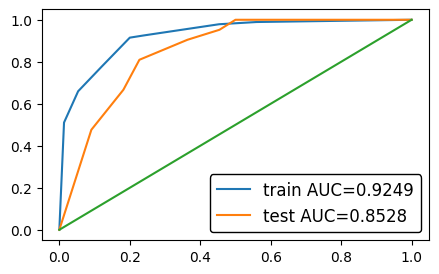

In [0]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
assess(dtc)

По результату мы понимаем, что использовать обычное голое дерево является идеей, как минимум, не самой здравой, особенно относительно того, что будет ниже

## Случайный лес

In [0]:
from sklearn.ensemble import RandomForestClassifier

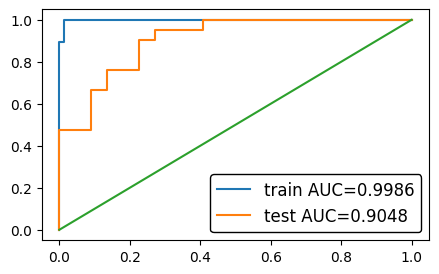

In [0]:
rfc = RandomForestClassifier(n_estimators=70, max_depth=6, random_state=42, max_leaf_nodes=100, warm_start=True)
assess(rfc)

Из графика можно сделать вывод, что модель сильно переобучилась, что, по моему опыту, характерно для Random Forestа. Возможно, если бы я поподбирал гиперпараметры через Grid Search, можно было бы улучшить ситуацию. Nuff said.

## Градиентный бустинг

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

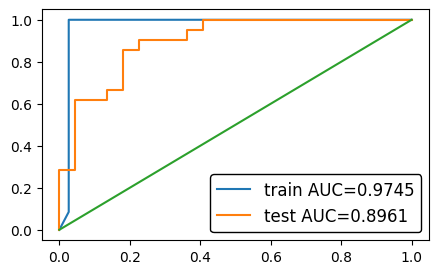

In [0]:
gbc = GradientBoostingClassifier(learning_rate=0.4, random_state=42, subsample=0.5, max_depth=4, warm_start=True)
assess(gbc)

Модель тоже переобучена, но тут Grid Search точно должен решить проблему.

## Линейная регрессия

Так как линейная регрессия будет использоваться в разделе ниже, посмотрим, какой результат она дает сейчас

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

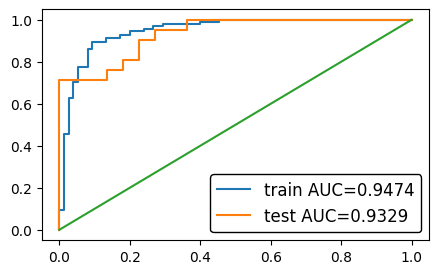

In [0]:
lr = LogisticRegression(solver='liblinear')
assess(lr)

Вот так. Стараешься, подбираешь гиперпараметры для каких-то сложных моделей, а простая линейная регрессия на голову уделывает их. Я не плачу.

## Стэкинг

В качестве основных моделей будем ипользовать Random Forest и логистическую регрессию, а в качестве метамодели градиентный бустинг.

In [0]:
estimators = [
        ('rf', RandomForestClassifier(n_estimators=70, max_depth=6, random_state=42, max_leaf_nodes=100, warm_start=True)),
        ('lr', LogisticRegression(solver='liblinear'))
    ]

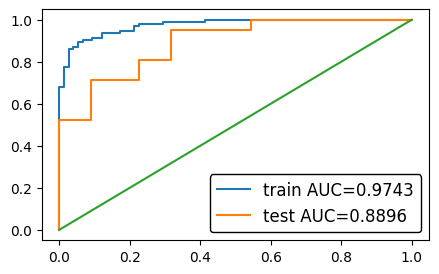

In [0]:
sc = StackingClassifier(estimators=estimators,
                        final_estimator=GradientBoostingClassifier(learning_rate=0.4, random_state=42, subsample=0.5, max_depth=4, warm_start=True))
assess(sc)

Лучший результат, который пока был. Да и вообще стэкинг крутой, лучший ансамбль из тройки, мне понравилось. Однозначный лайк.

# Проверка на тестовой выборке

Чтобы удостовериться, не накосячили ли мы, посмотрим, как наши модели отработают на тестовой выборке:

In [0]:
y_test = test['target']
X_test = test.drop(['target'], axis=1)

### Случайный лес

In [0]:
roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

0.9117073170731708

### Градиентный бустинг

In [0]:
roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])

0.8565853658536584

### Линейная регрессия

In [0]:
roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

0.9248780487804877

### Стэкинг

In [0]:
roc_auc_score(y_test, sc.predict_proba(X_test)[:, 1])

0.8875609756097561

<center>
<p>Мы накосячили.</p>
<img src="http://risovach.ru/upload/2016/12/generator/moya-ostanovochka_131434058_orig_.jpg" height="440" width="640">
</center>